# Import Library

In [440]:
#Data Manipulation
#=============================================
import numpy as np 
import pandas as pd 
from datetime import datetime, timedelta
#Data visualization 
#=============================================
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve
#Hypothesis Testing
#=============================================
from scipy.stats import ttest_ind,mannwhitneyu,pearsonr, f_oneway, kruskal
#model
#=============================================
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Optimize Data 
#=============================================
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
# pipeline
#=============================================
from sklearn.pipeline import Pipeline
#Data Preprocessing 
#=============================================
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
#Metrics
#=============================================
from sklearn.metrics import mean_squared_error

#Feature Selection 
#=============================================
from sklearn.feature_selection import SelectFromModel
#Pickel  
#=============================================
import pickle

# Load Data

In [321]:
cab=pd.read_csv('E:/My_Project/DataGlacier/Week 2/Eda project/DataSets-main/Cab_Data.csv')
city=pd.read_csv('E:/My_Project/DataGlacier/Week 2/Eda project/DataSets-main/City.csv')
Customer=pd.read_csv('E:/My_Project/DataGlacier/Week 2/Eda project/DataSets-main/Customer_ID.csv')
Transaction=pd.read_csv('E:/My_Project/DataGlacier/Week 2/Eda project/DataSets-main/Transaction_ID.csv')

# EDA

In [322]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [323]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [324]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [325]:
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [326]:
Transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [327]:
# Check the shape of whole dataset
print("shape of Cab_Data", cab.shape)
print("shape of Customer_ID", Customer.shape)
print("shape of Transaction_ID", Transaction.shape)
print("shape of City Data", city.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


#### Merge The Data into one dataset 

In [328]:
merge_1=Transaction.merge(Customer,on='Customer ID',suffixes=('_Tran','_Cust'))

In [329]:
merge_1.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [330]:
merge_2=merge_1.merge(cab,on='Transaction ID',suffixes=('_TC','_cab'))

In [331]:
merge_2.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,Male,33,8536,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [332]:
merge_2.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [333]:
merge_2

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,Male,33,8536,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,Male,32,6528,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,Male,56,7966,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,Male,32,6423,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [334]:
df=merge_2.merge(city,on='City',how='left')

#### Master Dataset

In [335]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [336]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

In [337]:
df.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
dtype: object

In [338]:
df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,21012.412463,12.594234,7969.409482,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,18.000000,2000.000000,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,60000.000000,65.000000,35000.000000,43465.000000,48.000000,2048.030000,691.200000


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB


In [340]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [341]:
df.to_csv('Final_Data.csv')

#### Convert the Date of travel to extract the year and the month 

In [342]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y") # lets to an example if we have a time n=44200 
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [343]:
df['Date of Travel'] = df['Date of Travel'].apply(lambda x:to_date_format(x))

In [344]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [345]:
months=[]
years=[]
for i in range(len(df['Date of Travel'])):
    months.append(df['Date of Travel'][i].month)
    years.append(df['Date of Travel'][i].year)
df['Year']=years
df['Month']=months    

In [346]:
df.drop(columns=['Date of Travel'],axis=1,inplace=True)

In [347]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1


In [348]:
df['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [349]:
df['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [350]:
df.duplicated().sum()

0

#### Lets see The Pink And The Yellow Cab 

In [351]:
pink_cab=df[df['Company']=='Pink Cab']
yellow_cab=df[df['Company']=='Yellow Cab']

In [352]:
len(pink_cab)

84711

In [353]:
len(yellow_cab)

274681

## lets Do Our Analysis 

In [354]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1


#### Monthly Transaction Analysis

In [355]:
Transaction_for_each_month=df[df['Company']=='Pink Cab'].groupby('Month')['Transaction ID'].count()

In [356]:
Transaction_for_each_month

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction ID, dtype: int64

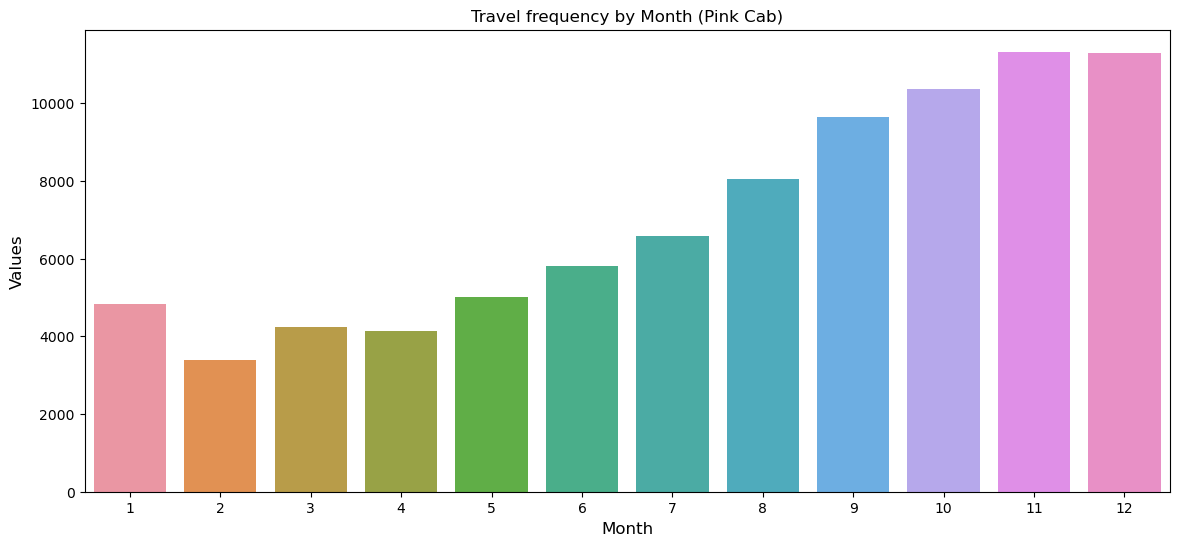

In [357]:
plt.figure(figsize=(14,6))
sns.barplot(x=Transaction_for_each_month.index,y=Transaction_for_each_month.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [358]:
Transaction_for_each_month=df[df['Company']=='Yellow Cab'].groupby('Month')['Transaction ID'].count()

In [359]:
Transaction_for_each_month

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction ID, dtype: int64

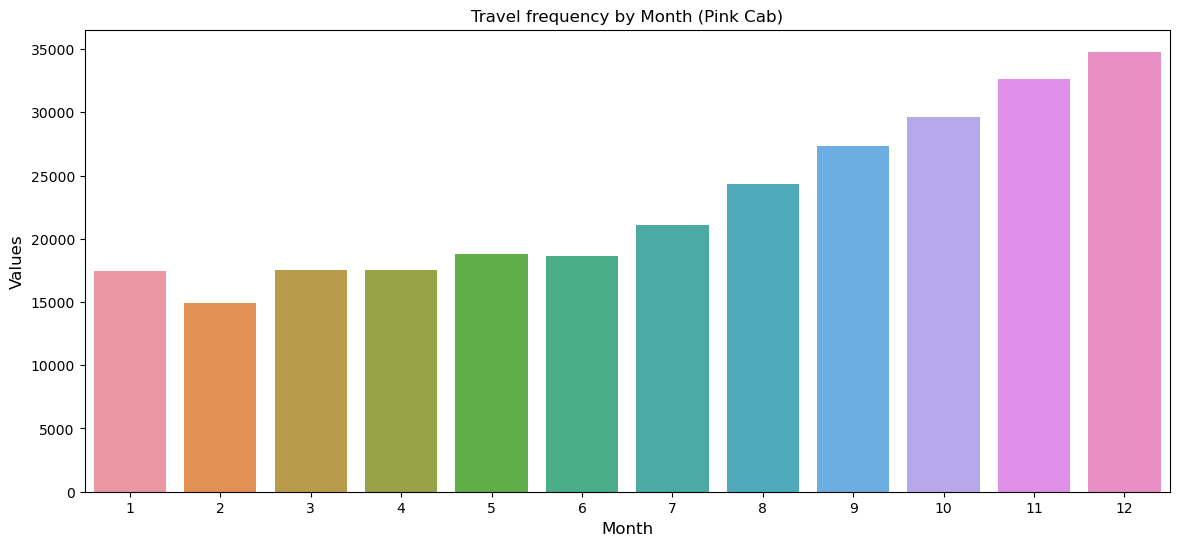

In [360]:
plt.figure(figsize=(14,6))
sns.barplot(x=Transaction_for_each_month.index,y=Transaction_for_each_month.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

### Yellow Has A Higher Travel in All the Months Assuming IT Has A better Services in the Car Such As A good (Ac) For Example or It has A modern Cars  

# ===========================================================================================================

### Lets See The Transaction per Year 

In [361]:
Transaction_for_each_year_Pink=df[df['Company']=='Pink Cab'].groupby('Year')['Transaction ID'].count()
Transaction_for_each_year_yellow=df[df['Company']=='Yellow Cab'].groupby('Year')['Transaction ID'].count()

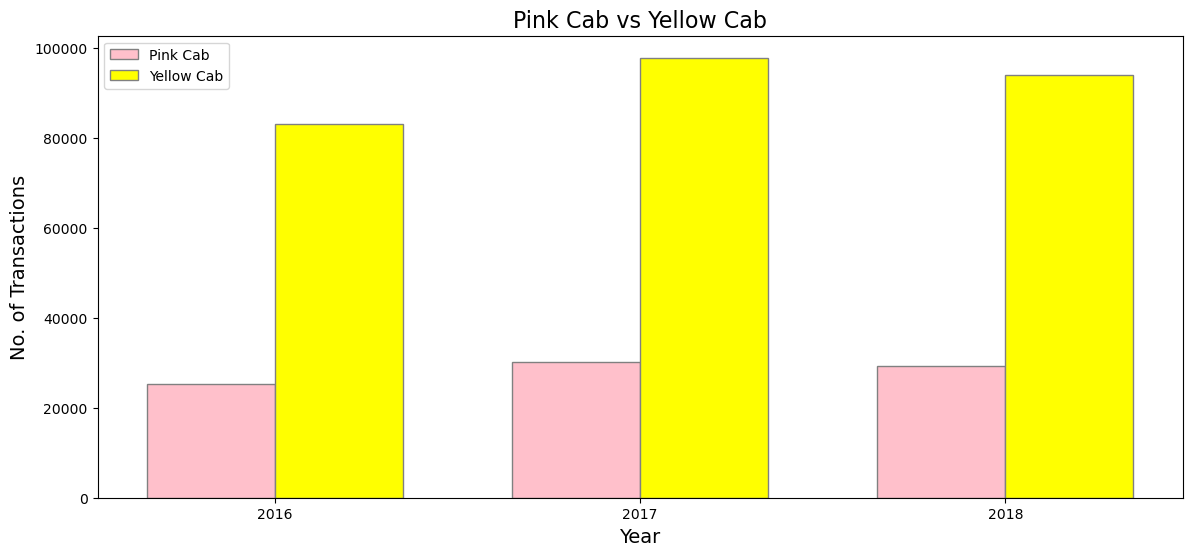

In [362]:
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.35
r1 = np.arange(len(Transaction_for_each_year_Pink))
r2 = [x + bar_width for x in r1]
ax.bar(r1, Transaction_for_each_year_Pink.values, color='pink', width=bar_width, edgecolor='grey', label='Pink Cab')
ax.bar(r2, Transaction_for_each_year_yellow.values, color='yellow', width=bar_width, edgecolor='grey', label='Yellow Cab')
ax.set_xticks([r + bar_width/2 for r in range(len(Transaction_for_each_year_Pink))])
ax.set_xticklabels(Transaction_for_each_year_Pink.index)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('No. of Transactions', fontsize=14)
ax.set_title('Pink Cab vs Yellow Cab', fontsize=16)
ax.legend()
plt.show()



## We See Also The Number Of Transaction In the Yellow Cab is Higher than Pink Cab  

# ===========================================================================================================

# Lets Compare The Profit Each Month And Each Year  

In [363]:
yellow_cab['Profit']=yellow_cab['Price Charged']-yellow_cab['Cost of Trip']
pink_cab['Profit']=pink_cab['Price Charged']-pink_cab['Cost of Trip']

C:\Users\HP\AppData\Local\Temp\ipykernel_18448\1192819615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cab['Profit']=yellow_cab['Price Charged']-yellow_cab['Cost of Trip']
C:\Users\HP\AppData\Local\Temp\ipykernel_18448\1192819615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab['Profit']=pink_cab['Price Charged']-pink_cab['Cost of Trip']


In [364]:
yellow_cab.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month,Profit
233,10000384,27602,Card,Male,23,8542,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,"814,885","24,701",2016,1,877.0076
234,10000385,27594,Cash,Male,28,3901,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,"814,885","24,701",2016,1,895.7768
235,10000386,27884,Cash,Male,32,13505,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,"814,885","24,701",2016,1,232.3320
236,10000387,28533,Cash,Male,39,28386,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,"814,885","24,701",2016,1,504.1600
237,10000388,29039,Card,Male,35,17761,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,"814,885","24,701",2016,1,944.1908


In [365]:
pink_cab.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month,Profit
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1,57.315
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1,23.666
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1,27.568
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1,25.798
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1,16.844


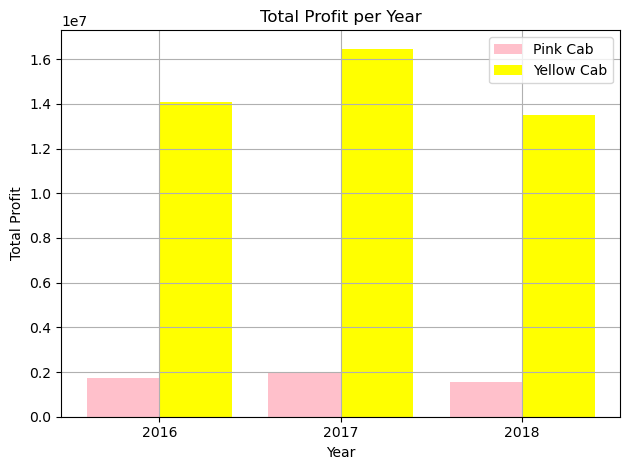

In [366]:
profit_per_year_pink = pink_cab['Profit'].groupby(pink_cab['Year']).sum()
plt.bar(profit_per_year_pink.index - 0.2, profit_per_year_pink.values,color='pink', width=0.4, label='Pink Cab')

profit_per_year_yellow = yellow_cab['Profit'].groupby(yellow_cab['Year']).sum()
plt.bar(profit_per_year_yellow.index + 0.2, profit_per_year_yellow.values,color='yellow', width=0.4, label='Yellow Cab')

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit per Year')
plt.xticks(profit_per_year_pink.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# From The Fig : 
### We See That The Profit Increase in 2017 in both Yellow and Pink cab 
### We See Also That The Yellow Cab Profit is Higher Than Pink Cab 
### We see Also Both Got Decrease  in 2018  

### But An Assumption :  In 2018 

"The decrease in American cab industry profits in 2018 can be attributed to the rise of ride-sharing services like Uber and Lyft, which offer competitive pricing and innovative technology, attracting consumers away from traditional taxis. Consumers increasingly prefer the convenience and flexibility of ride-sharing apps due to quicker response times, cleaner vehicles, and real-time ride tracking. Additionally, traditional taxi companies face higher operating costs due to regulatory challenges, including licensing fees and insurance requirements. These companies also lag in adopting new technologies, resulting in less efficient operations and a poorer customer experience compared to ride-sharing services. Furthermore, ride-sharing platforms offer more flexible working arrangements for drivers, leading many taxi drivers to switch, further reducing the profitability of traditional cab companies."

### In 2017 It increases Because : 
#### 1) Economic Growth
#### 2)Increased Demand
#### 3)Pricing Strategies






# ===========================================================================================================

## lets see The KM_Travel 

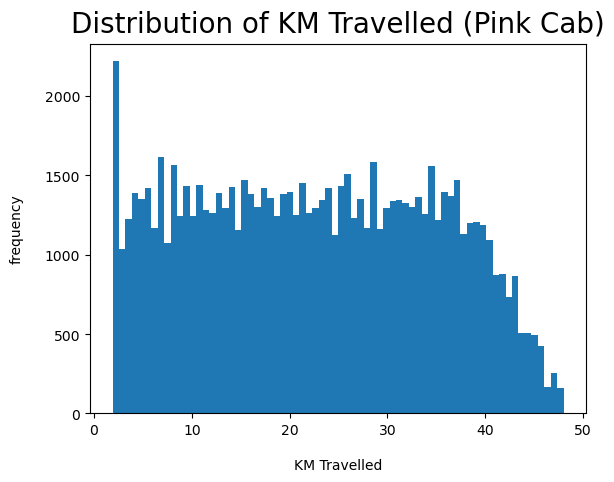

In [367]:
plt.hist(pink_cab['KM Travelled'],bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

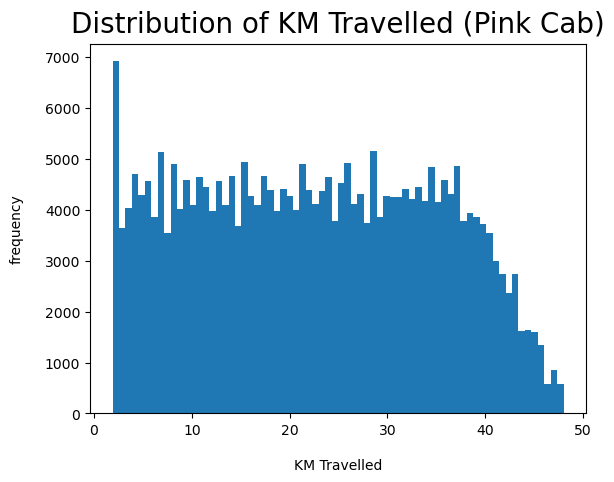

In [368]:
plt.hist(yellow_cab['KM Travelled'],bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

### We can see from both Distribution That range of the rides is approx from 2 to 48 Km

# ===============================================================================================================================================

# Lets Compare The Prices 

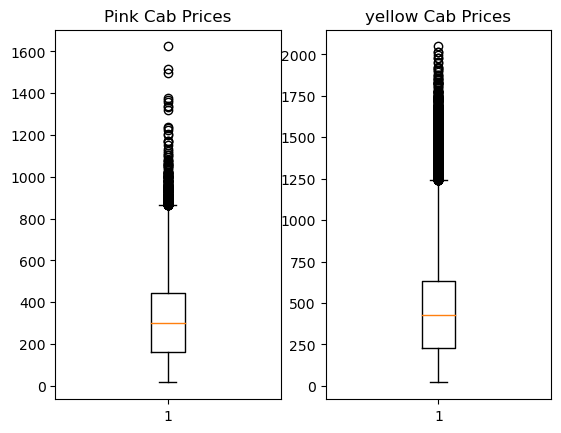

In [369]:
fig,ax=plt.subplots(1,2)
ax[0].boxplot(pink_cab['Price Charged'])
ax[0].set_title('Pink Cab Prices')
ax[1].boxplot(yellow_cab['Price Charged'])
ax[1].set_title('yellow Cab Prices')
plt.show()

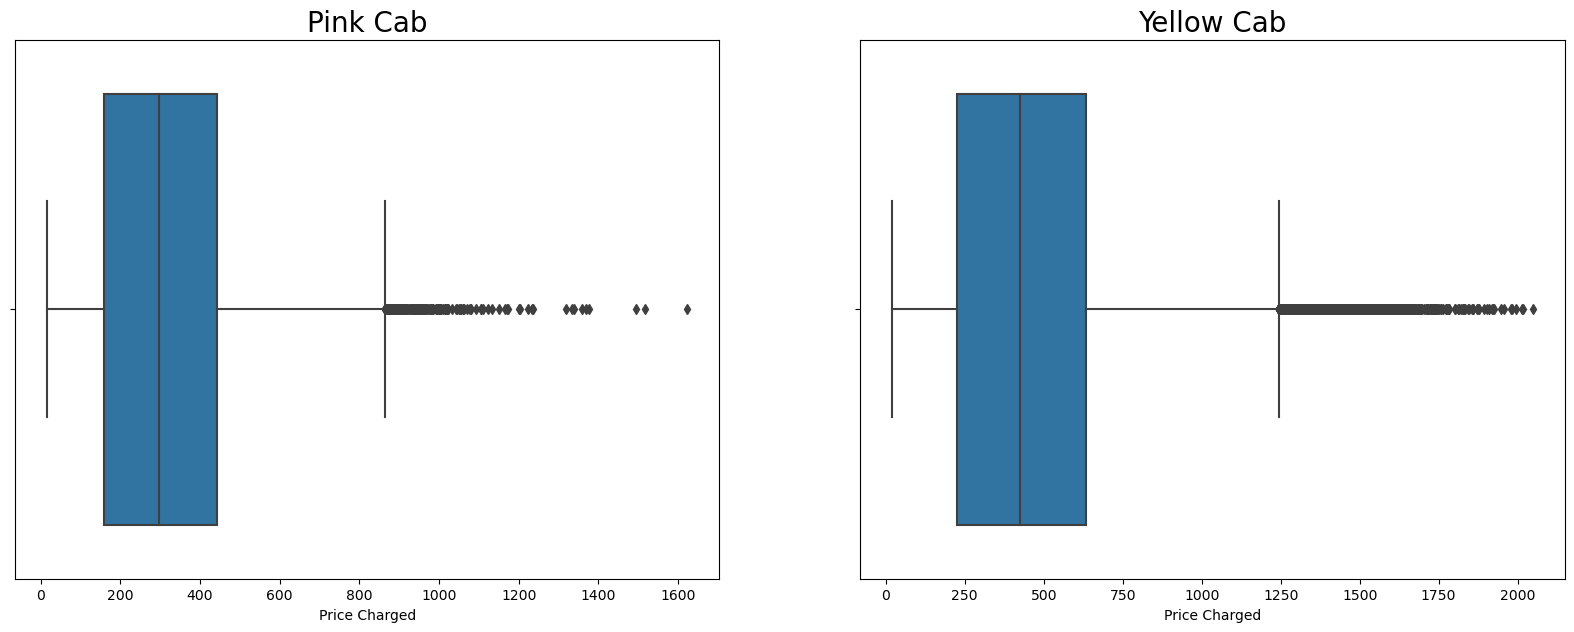

In [370]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(data=pink_cab,x='Price Charged', ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(data=yellow_cab,x='Price Charged', ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

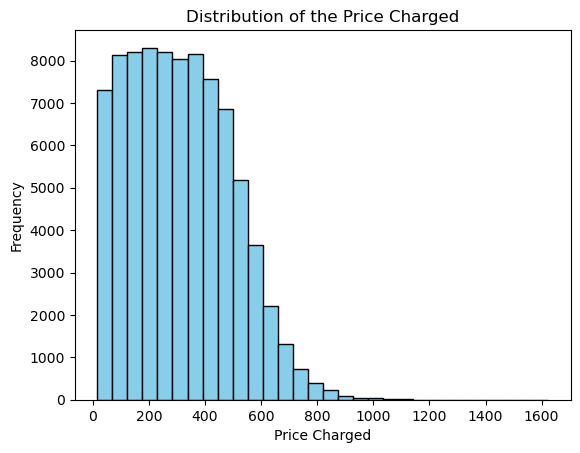

In [371]:
plt.hist(pink_cab['Price Charged'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of the Price Charged')
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.show()

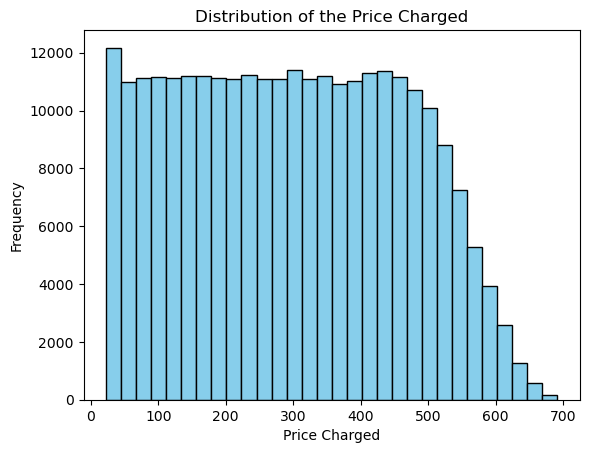

In [372]:
plt.hist(yellow_cab['Cost of Trip'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of the Price Charged')
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.show()

#### We just see the outliers of The Prices it means that :
#### 1) The Cars Prices in the Yellow cab is more higher  than the Pink which indicate of other services maybe . 
#### 2) The Type of The Cars in the yellow cap are  a gasoline based cars  so that indicate of the higher prices 
#### 3) If Assumption 2 is wrong That indicates of an a discounts or based on the city rules  in A yellow cars sometimes thats one of the reason of changing the prices  

# ==============================================================================================================================================================================

# Lets See The Each City And Its Distince with Its Price 

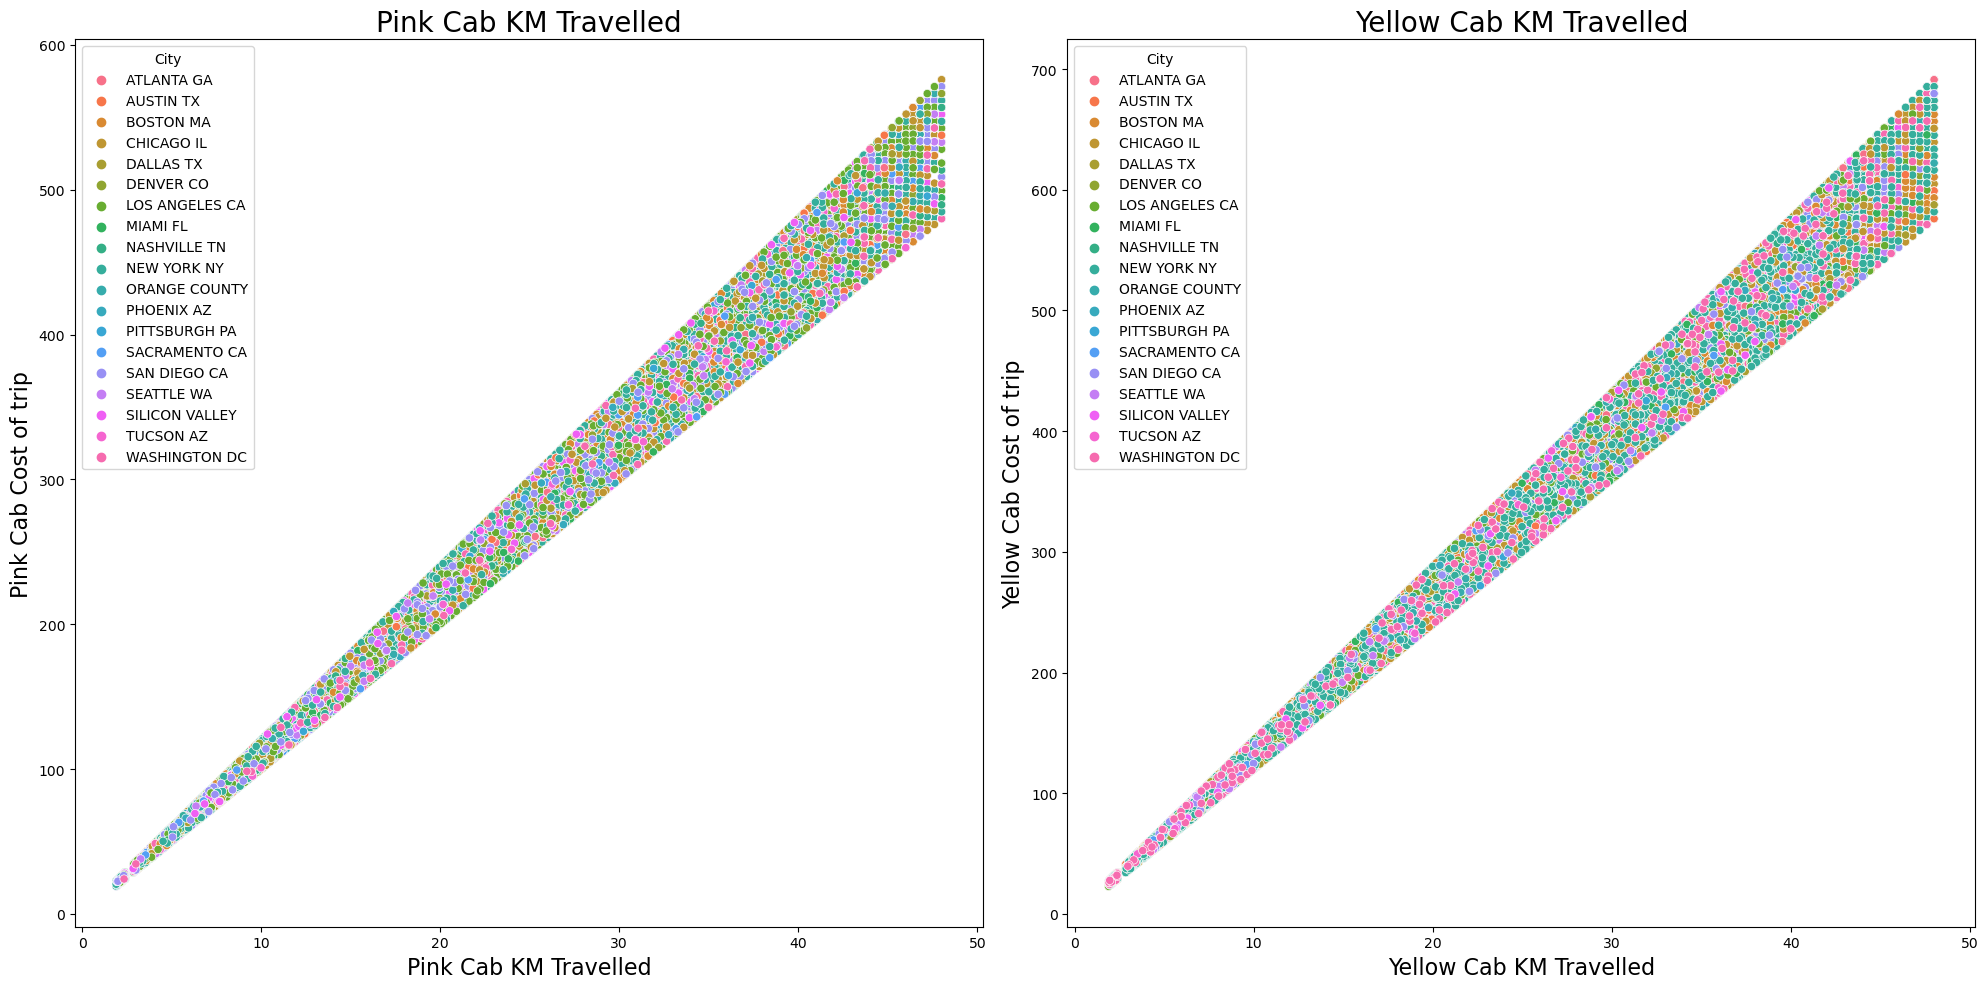

In [373]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(data=df, x=pink_cab["KM Travelled"], y=pink_cab['Cost of Trip'], hue="City", ax=axes[0])
axes[0].set_title('Pink Cab KM Travelled', fontsize=20)
axes[0].set_ylabel('Pink Cab Cost of trip', fontsize=16)
axes[0].set_xlabel('Pink Cab KM Travelled', fontsize=16)
sns.scatterplot(data=df, x=yellow_cab["KM Travelled"], y=yellow_cab['Cost of Trip'], hue="City", ax=axes[1])
axes[1].set_title('Yellow Cab KM Travelled', fontsize=20)
axes[1].set_ylabel('Yellow Cab Cost of trip', fontsize=16)
axes[1].set_xlabel('Yellow Cab KM Travelled', fontsize=16)
plt.tight_layout()  
plt.show()

## We See That The Longer The Distance the Higher the price , in the yellow cab still highest Cost  

==============================================================================================================================================================================

# Which City Has The heights population ? 

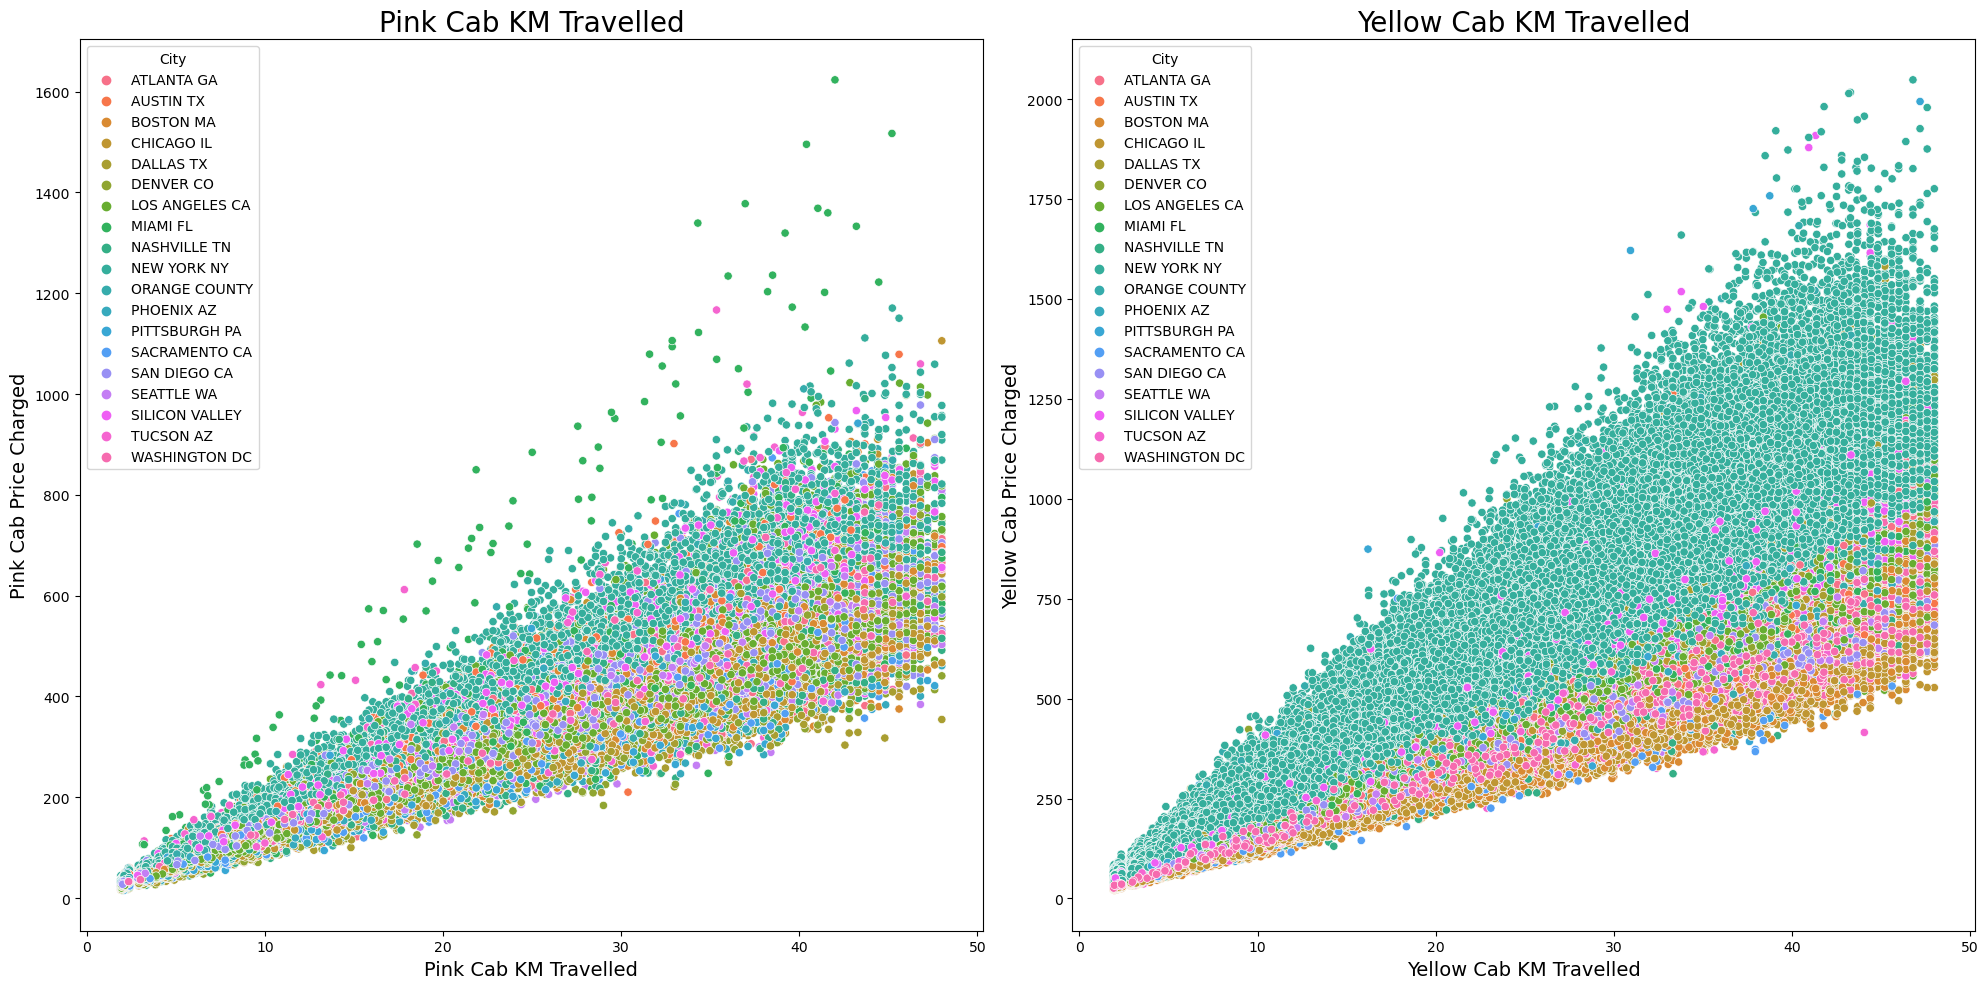

In [374]:
plt.figure(figsize=(20,10))

plt.subplot(121) 
sns.scatterplot(data=df, x=pink_cab["KM Travelled"], y=pink_cab['Price Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)

plt.subplot(122)  
sns.scatterplot(data=df, x=yellow_cab["KM Travelled"], y=yellow_cab['Price Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## From This Graph we Find that :
##### 1) New york city is the heights amoung all the cities in the Yellow cab and Pink cab indicate for a higher population  
##### 2) there is a strong  posative correlation between  price and km travelled 

In [375]:
pink_cab['KM Travelled'].corr(pink_cab['Price Charged'])

0.927765278259487

In [376]:
yellow_cab['KM Travelled'].corr(yellow_cab['Price Charged'])

0.8597086294478481

# =======================================================================================================================================================

# lets See The Population  :)

In [377]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1


In [378]:
city_users=df.groupby('City')['Users'].count()

In [379]:
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

### Lets Plot The Top 10 Cities in Population 

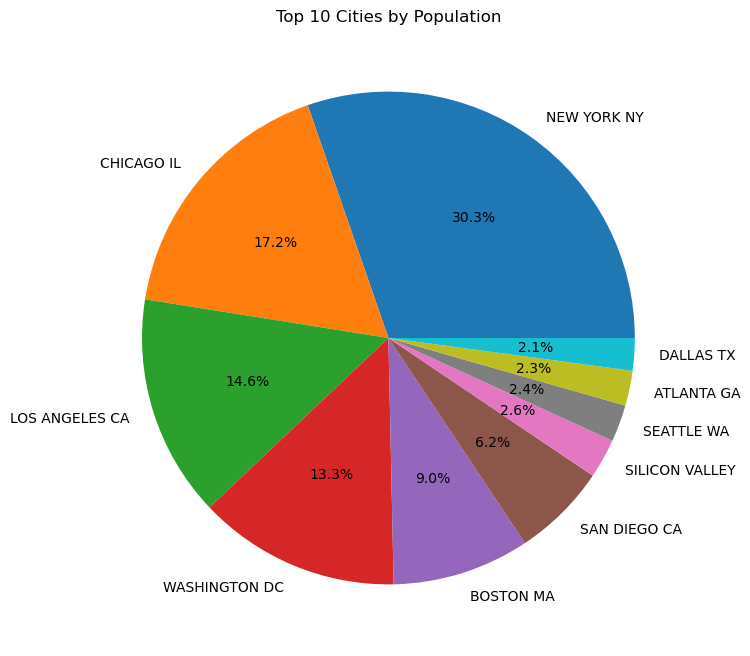

In [380]:
sorted_cities = city_users.sort_values(ascending=False)
top_10_cities = sorted_cities.head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_10_cities.values, labels=top_10_cities.index, autopct='%1.1f%%')
plt.title('Top 10 Cities by Population')
plt.show()

### We see that the NY has the heighst population and Its The most city that used the cap  
### We see also that Chicago the 2nd one haS 17.2 OF Population that means both cities have a great economic , health care centers ,etc....  
#### ================================================================================================================================================

# Lets Check Which city has the greatest transactions 

In [381]:
yellow_transaction=df[df['Company']=='Yellow Cab'].groupby('City')['Transaction ID'].count()
pink_transaction=df[df['Company']=='Pink Cab'].groupby('City')['Transaction ID'].count()

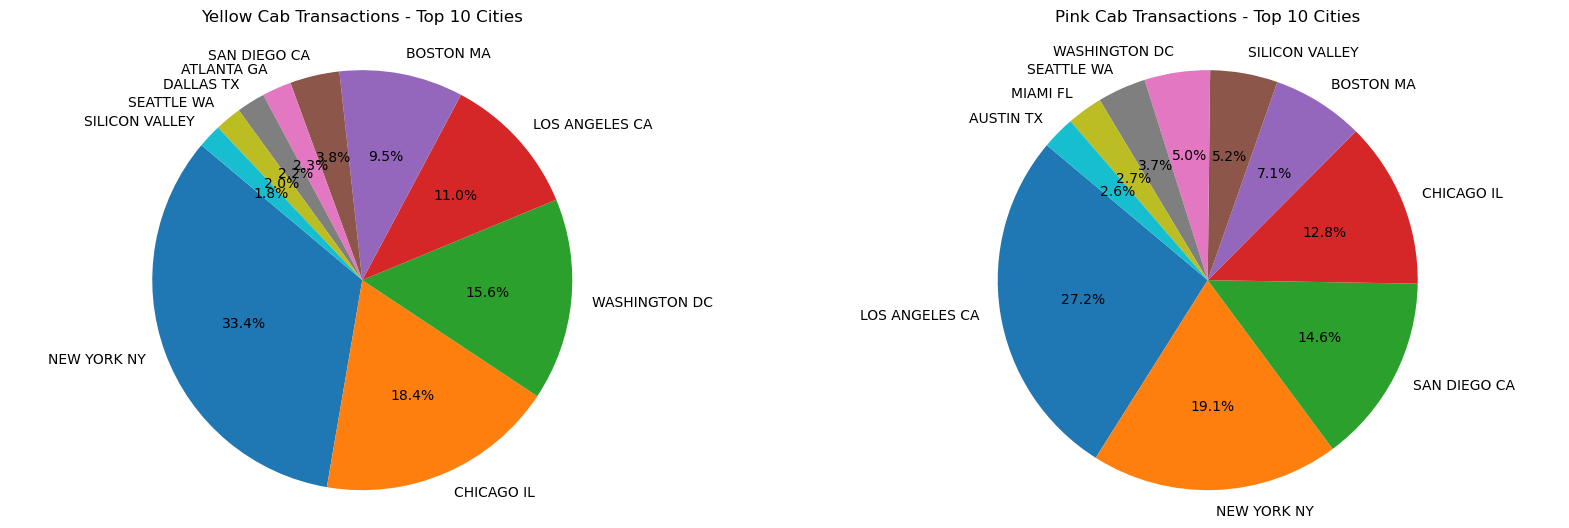

In [382]:
top_10_yellow = yellow_transaction.sort_values(ascending=False).head(10)
top_10_pink = pink_transaction.sort_values(ascending=False).head(10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.pie(top_10_yellow, labels=top_10_yellow.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Yellow Cab Transactions - Top 10 Cities', loc='center', pad=20)
ax1.axis('equal')
ax2.pie(top_10_pink, labels=top_10_pink.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Pink Cab Transactions - Top 10 Cities', loc='center', pad=20)
ax2.axis('equal')
plt.show()

#### From The Figure we see that : 
#### 1)New york city has the Heighest Transaction in Yellow cap  
#### 2)Los Angeles city has the Heighest Transaction in pink cap  
#### 3) Both Has Large population The Reason maybe Because LA has promot the pink cap better than the yellow cap , and NY promot the Yellow cap better than the pink cap 
#### 4) Another Reasons LA is Cheaper in pink cab than the Yellow cab , Or The prices in pink sutable to everyone in there cities    


# =========================================================================================================================================================

# Gender Analysis , Lets See Who is using the Cap most :)

In [383]:
gender_for_yellow=df[df['Company']=='Yellow Cab'].groupby('Gender')['Price Charged'].mean()
gender_for_pink=df[df['Company']=='Pink Cab'].groupby('Gender')['Price Charged'].mean()

In [384]:
gender_for_yellow

Gender
Female    454.571538
Male      460.821326
Name: Price Charged, dtype: float64

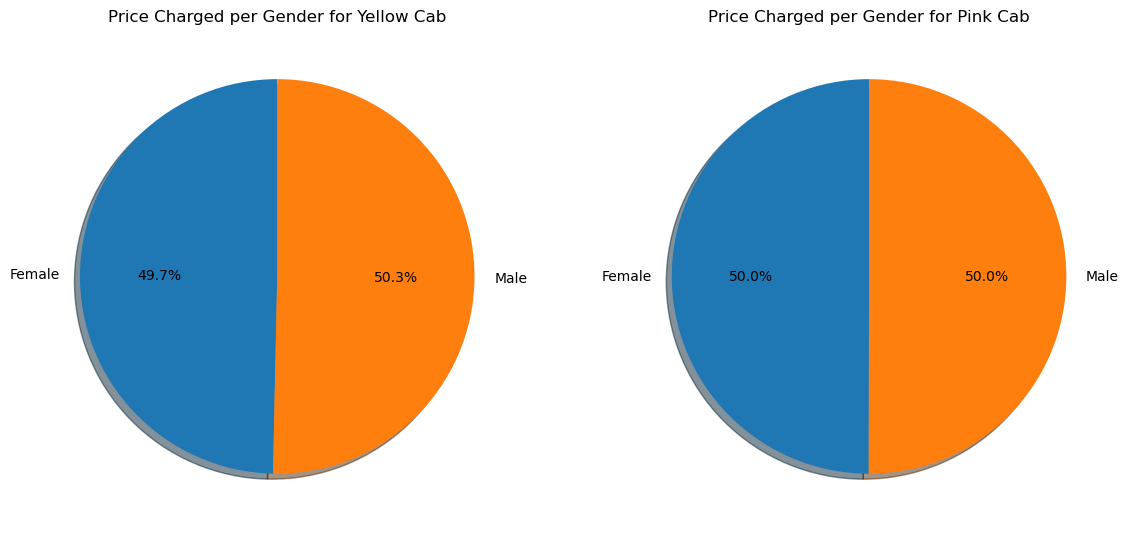

In [385]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))


ax1 = axes[0]
ax1.pie(gender_for_yellow.values, labels=gender_for_yellow.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Price Charged per Gender for Yellow Cab')


ax2 = axes[1]
ax2.pie(gender_for_pink.values, labels=gender_for_pink.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Price Charged per Gender for Pink Cab')

plt.show()

#### 1 ) From This Figuer we see That the Yellow cab Takes From The Mail More than the Female : Indicate that the discounts is for the Girls is much better than the boys or it seems that the girls go in a short distances than the boys.

#### 2) The Pink charge both Girl And Boys the same 





# ===================================================================

### Lets see The % Of each Gender in Cap Company based on Customer Id

In [386]:
gender_cab=df.groupby(['Company','Gender'])['Customer ID'].nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

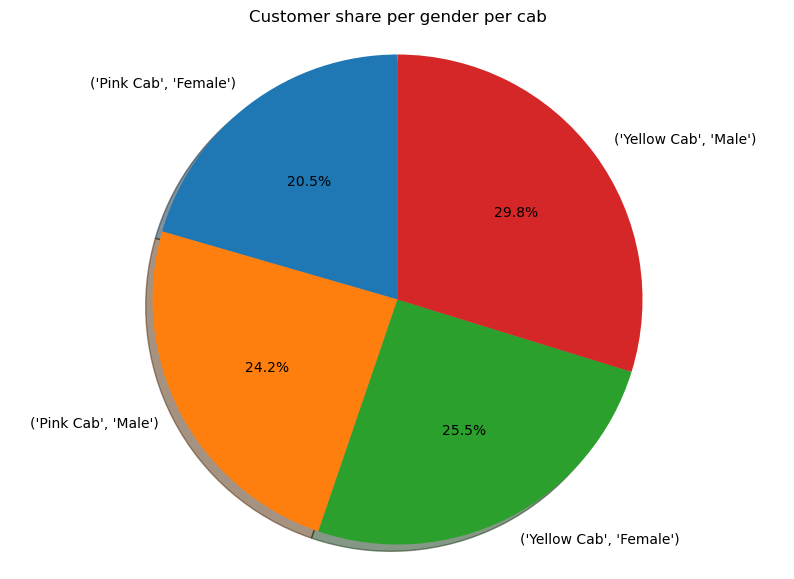

In [387]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

## WE Can see That : 
### 1) Male are the most used for the cap cars , Because He Travell a lot , from time to time 
### 2) Girls are less Move than the mans  
### 3) Yellow cap is Used most   

# =================================================================================================

# Lets See The correlation of The Data  

In [388]:
df['Profit']=df['Price Charged']-df['Cost of Trip']

In [389]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month,Profit
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1,57.315
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1,23.666
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1,27.568
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1,25.798
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1,16.844


In [390]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Year,Month,Profit
Transaction ID,1.000000,-0.016912,-0.001267,-0.001570,-0.001429,-0.052902,-0.003462,0.941475,0.284724,-0.087130
Customer ID,-0.016912,1.000000,-0.004735,-0.013608,0.000389,-0.177324,0.003077,-0.002480,-0.045030,-0.306527
Age,-0.001267,-0.004735,1.000000,0.003907,-0.000369,-0.003084,-0.000189,-0.000497,-0.002376,-0.005093
Income (USD/Month),-0.001570,-0.013608,0.003907,1.000000,-0.000544,0.003228,-0.000633,-0.001679,0.000585,0.006148
KM Travelled,-0.001429,0.000389,-0.000369,-0.000544,1.000000,0.835753,0.981848,-0.001094,-0.001773,0.462768
Price Charged,-0.052902,-0.177324,-0.003084,0.003228,0.835753,1.000000,0.859812,-0.036903,-0.059639,0.864154
Cost of Trip,-0.003462,0.003077,-0.000189,-0.000633,0.981848,0.859812,1.000000,-0.001766,-0.008309,0.486056
Year,0.941475,-0.002480,-0.000497,-0.001679,-0.001094,-0.036903,-0.001766,1.000000,-0.033169,-0.061420
Month,0.284724,-0.045030,-0.002376,0.000585,-0.001773,-0.059639,-0.008309,-0.033169,1.000000,-0.093886
Profit,-0.087130,-0.306527,-0.005093,0.006148,0.462768,0.864154,0.486056,-0.061420,-0.093886,1.000000


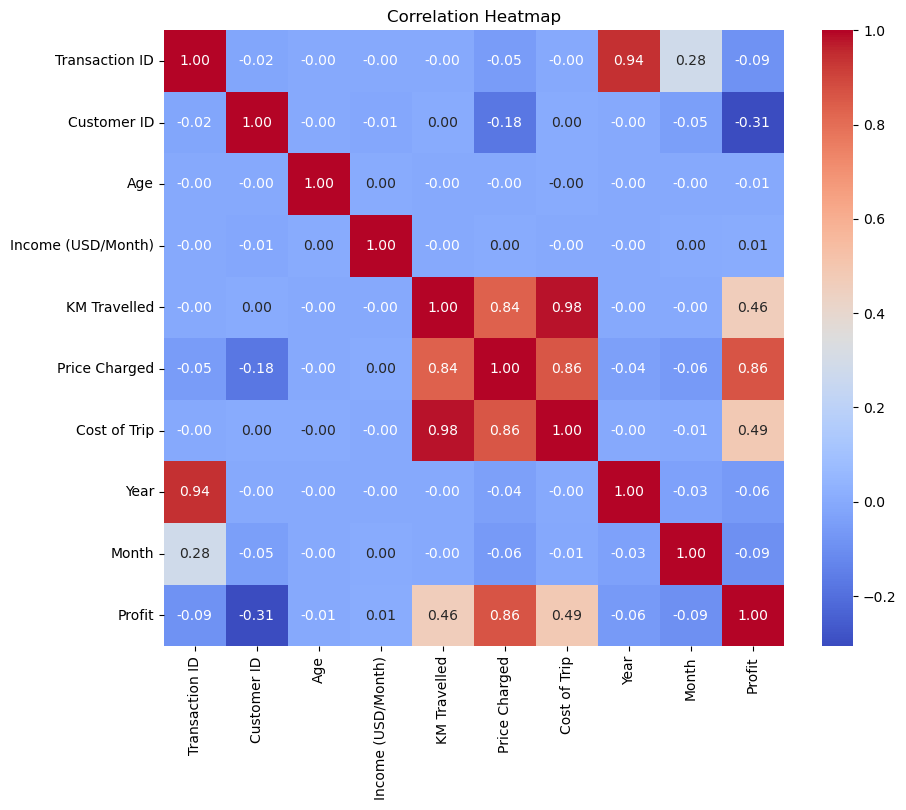

In [391]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 1)The variables listed on the left side of the heatmap are: Transaction ID, Customer ID, Age, Income (USD/Month), KM Travelled, Price Charged, Cost of Trip, Year, Month, and Profit.
## 2)The variables listed on the top of the heatmap are the same.
## 3)The number in each box shows the correlation coefficient between the two variables on the left and top of that box. A correlation coefficient of 1 means that there is a perfect positive correlation between the two variables. A correlation coefficient of -1 means that there is a perfect negative correlation. A correlation coefficient of 0 means that there is no correlation between the two variables.

# ===============================================================================================================================================

# Hypothesis Testing

## t-Test Explained

This document explores the t-test, a statistical tool used to assess the significance of differences between means of two groups. It's particularly valuable when dealing with continuous outcome variables and categorical explanatory variables with two levels (groups).


### Common Applications of the t-Test

Here are some scenarios where the t-test shines:

* **Comparing Independent Groups:** Analyze the means of a continuous variable (e.g., test scores, profit) between independent groups (e.g., males vs. females, treatment vs. control).

> **Example:**  Compare the average test scores of students who participated in a special tutoring program with those who didn't.

* **Before and After Intervention:** Evaluate if there's a significant difference in the means of the same group measured at two different time points (e.g., before and after an intervention).

> **Example:** Investigate if a training program significantly improves students' test scores.


### t-Test Assumptions

To ensure valid results, the t-test relies on specific assumptions:

* **Sample Size:** When sample sizes are small (generally less than 30) and the population standard deviation is unknown, the t-test is preferred over the z-test.

> **Example:** Analyze mean blood pressure levels between two patient groups in a clinical trial.

* **Normality:** The t-test presumes a normal distribution of data within each group. While it tolerates minor normality violations with large samples, it's best to check for normality beforehand.

> **Example:** Verify if there's a significant difference in mean reaction times between two groups in a psychology experiment.

* **Equal Variance:** There are two primary t-test types:
    * Equal variance (homogeneity of variance) t-test: assumes equal variances in both groups.
    * Unequal variance t-test: doesn't make this assumption.

> **Example:** Analyze the mean heights of male and female students. Depending on prior knowledge or data exploration, you might or might not assume equal variances.


In conclusion, the t-test is a versatile and widely used statistical tool for comparing means in various research and analytical contexts. Remember to verify that the assumptions of the t-test are met for reliable results.

# -----------------------------------------------------

##  **1) Gender Impact on Profit**

This analysis compares the mean profit between male and female customers using a two-sample t-test.

**Hypotheses:**

* **H0:** There is no significant difference in mean profit between male and female customers.
* **HA:** There is a significant difference in mean profit between male and female customers.
* **Test:** Conduct a two-sample t-test to compare the mean profit of male and female customers.

In [392]:
profit_male = df[df['Gender'] == 'Male']['Profit']
profit_female = df[df['Gender'] == 'Female']['Profit']
t_statistic, p_value = ttest_ind(profit_male, profit_female)
alpha = 0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in profit between male and female customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in profit between male and female customers.")

T-statistic: 12.70131593950125
P-value: 5.921884821326977e-37
Reject null hypothesis: There is a significant difference in profit between male and female customers.


## **2) Effect of Payment Mode on Profit:**
**Hypotheses:**
* **H0:** There is no significant difference in profit between customers who pay by card and those who pay by cash.
* **HA:** There is a significant difference in profit between customers who pay by card and those who pay by cash.
* **Test:** Perform a t-test or Mann-Whitney U test to compare the profit distributions for card and cash payments.

In [393]:
profit_card = df[df['Payment_Mode'] == 'Card']['Profit']
profit_cash = df[df['Payment_Mode'] == 'Cash']['Profit']
t_statistic, p_value = ttest_ind(profit_card, profit_cash)
alpha = 0.05
print("Results of t-test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in profit between customers who pay by card and those who pay by cash.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in profit between customers who pay by card and those who pay by cash.")

Results of t-test:
T-statistic: -0.7630743349932244
P-value: 0.4454195660215633
Fail to reject null hypothesis: There is no significant difference in profit between customers who pay by card and those who pay by cash.


### Mann-Whitney U Test

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups (samples) to assess whether their distributions differ significantly. It's particularly useful when you don't have assumptions about the normality (Gaussian distribution) of your data.

### Test Breakdown:

- **Null Hypothesis (H0):** The distributions of the two groups are identical.
- **Alternative Hypothesis (H1):** The distributions of the two groups are different (one may be shifted higher or lower than the other).
- **U Statistic:** The Mann-Whitney U statistic is a non-parametric measure that reflects the degree of overlap between the two ranked samples. A smaller U value indicates less overlap and potentially more significant differences.
- **P-value:** The p-value represents the probability of observing a U value as extreme or more extreme than the calculated value, assuming the null hypothesis is true. A lower p-value (typically less than 0.05) suggests that the observed difference between the groups is statistically significant, leading to the rejection of the null hypothesis.

### Example Code (Python):

```python
import scipy.stats as stats

# Sample data (replace with your actual data)
group1 = [10, 15, 8, 12, 9]
group2 = [7, 5, 18, 11, 13]

# Perform the Mann-Whitney U test
u, p = stats.mannwhitneyu(group1, group2)

# Print the results (interpretation needed outside of Markdown)
print("U statistic:", u)
print("p-value:", p)


In [394]:
u_statistic, p_value = mannwhitneyu(profit_card, profit_cash)
print("\nResults of Mann-Whitney U test:")
print("U-statistic:", u_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in profit between customers who pay by card and those who pay by cash.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in profit between customers who pay by card and those who pay by cash.")


Results of Mann-Whitney U test:
U-statistic: 15510758394.0
P-value: 0.8301092148814103
Fail to reject null hypothesis: There is no significant difference in profit between customers who pay by card and those who pay by cash.


### **3) Age and Profit Relationship:**

* **H0:** There is no correlation between age and profit.
* **HA:** There is a significant correlation between age and profit. 
* **Test:** Calculate the Pearson correlation coefficient between age and profit.

# **pearsonr Function :**
##### The pearsonr function is a part of the scipy.stats module in Python. It is used to calculate the Pearson correlation coefficient and the associated p-value for testing non-correlation between two variables.

In [395]:
age = df['Age']
profit = df['Profit']
correlation_coefficient, p_value = pearsonr(age, profit)
alpha = 0.05
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis (H0). There is a significant correlation between age and profit.")
else:
    print("Fail to reject null hypothesis (H0). There is no significant correlation between age and profit.")

Pearson correlation coefficient: -0.005092963667618835
P-value: 0.002264105651669707
Reject null hypothesis (H0). There is a significant correlation between age and profit.


## **4) Income Level and Profitability:**

* **H0:** There is no association between income level and profit.
* **H1:** There is a significant association between income level and profit.
* **Test:** Use ANOVA or Kruskal-Wallis test to compare profit across different income groups.

## **One-way ANOVA (Analysis of Variance):**

* **ANOVA is used to compare means across two or more groups to determine if there are statistically significant differences between them.**
* **Assumption: Data should be normally distributed within each group, and the variances across groups should be approximately equal.**
* **Null hypothesis (H0): There is no significant difference in means among the groups.**
* **Alternative hypothesis (Ha): At least one group mean is different from the others.**
* **F-test is used to assess whether the means of the groups are significantly different.**

## **Kruskal-Wallis Test:** 

* **Kruskal-Wallis is a non-parametric test used to compare the distribution of ranked data across two or more groups.**
* **It does not assume that the data are normally distributed, making it suitable for non-normally distributed data or ordinal data.**
* **Null hypothesis (H0): There is no significant difference in the distributions of the groups.**
* **Alternative hypothesis (Ha): At least one group has a different distribution from the others.**
* **It ranks all the data from all groups combined, and then tests whether the means of the ranks are significantly different across groups.**

In [396]:
income_categories = pd.qcut(df['Income (USD/Month)'], q=3, labels=['Low', 'Medium', 'High'])
df['Income_Level'] = income_categories
low_income = df[df['Income_Level'] == 'Low']['Profit']
medium_income = df[df['Income_Level'] == 'Medium']['Profit']
high_income = df[df['Income_Level'] == 'High']['Profit']

In [397]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month,Profit,Income_Level
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1,57.315,Medium
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1,23.666,Low
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1,27.568,Medium
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1,25.798,High
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1,16.844,Low


In [398]:
f_statistic, p_value = f_oneway(low_income, medium_income, high_income)

print("ANOVA Test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between income level and profit.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between income level and profit.")

ANOVA Test:
F-statistic: 13.973536610620892
p-value: 8.542915321759085e-07
Reject the null hypothesis. There is a significant association between income level and profit.


In [399]:
# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(low_income, medium_income, high_income)

print("\nKruskal-Wallis Test:")
print("H-statistic:", h_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between income level and profit.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between income level and profit.")


Kruskal-Wallis Test:
H-statistic: 19.296449973611086
p-value: 6.45400248178882e-05
Reject the null hypothesis. There is a significant association between income level and profit.


## **5)Effect of City Population on Profit:**

* **H0:** There is no significant difference in profit between cities with different populations.
* **HA:** Profit varies significantly between cities with different populations.
* **Test:** Perform ANOVA or Kruskal-Wallis test to compare profit among cities with different population sizes.

In [400]:
city_groups = {}
for city, group in df.groupby('City'):
    city_groups[city] = group['Profit'] 

In [401]:
city_groups

{'ATLANTA GA': 0          57.3150
 1          23.6660
 2          27.5680
 3          25.7980
 4          16.8440
             ...   
 357502      6.3700
 357503    132.2676
 357504     15.4228
 357505     39.7924
 357506    138.2292
 Name: Profit, Length: 7557, dtype: float64,
 'AUSTIN TX': 6         100.9500
 7          88.2100
 257       638.2648
 258       496.7816
 259       244.2956
             ...   
 357534     21.8460
 357535     35.3100
 357536     42.6064
 357537     50.4100
 357538     57.3140
 Name: Profit, Length: 4896, dtype: float64,
 'BOSTON MA': 8         44.7300
 9         43.7240
 10        95.6300
 11        97.0900
 12        23.6100
            ...   
 357670     1.0636
 357671    41.5320
 357672     2.2260
 357673    -4.4432
 357674    59.2100
 Name: Profit, Length: 29692, dtype: float64,
 'CHICAGO IL': 23        118.3300
 24          3.7500
 25        133.9520
 26         19.5220
 27         86.1050
             ...   
 357955    -42.3148
 357956    -86.0116
 

In [402]:
f_statistic, p_value_anova = f_oneway(*city_groups.values())
print("ANOVA Test Result:")
print("F-statistic:", f_statistic)
print("p-value:", p_value_anova)
alpha = 0.05
if p_value_anova < alpha:
    print("\nReject the null hypothesis (ANOVA): There is a significant difference in profit among cities with different population sizes.")
else:
    print("\nFail to reject the null hypothesis (ANOVA): There is no significant difference in profit among cities with different population sizes.")

ANOVA Test Result:
F-statistic: 9528.597969224551
p-value: 0.0

Reject the null hypothesis (ANOVA): There is a significant difference in profit among cities with different population sizes.


In [403]:
h_statistic, p_value_kruskal = kruskal(*city_groups.values())
print("\nKruskal-Wallis Test Result:")
print("H-statistic:", h_statistic)
print("p-value:", p_value_kruskal)
if p_value_kruskal < alpha:
    print("Reject the null hypothesis (Kruskal-Wallis): There is a significant difference in profit among cities with different population sizes.")
else:
    print("Fail to reject the null hypothesis (Kruskal-Wallis): There is no significant difference in profit among cities with different population sizes.")


Kruskal-Wallis Test Result:
H-statistic: 106661.18078004384
p-value: 0.0
Reject the null hypothesis (Kruskal-Wallis): There is a significant difference in profit among cities with different population sizes.


## 6)**Relationship between Distance Traveled and Profit:**

* **H0:** There is no correlation between the distance traveled and profit.
* **HA:** There is a significant correlation between the distance traveled and profit.
* **Test:** Calculate the Pearson correlation coefficient between distance traveled and profit.

In [404]:
pearson_corr, p_value = pearsonr(df['KM Travelled'], df['Profit'])
alpha = 0.05
print("Pearson correlation coefficient between distance traveled and profit:", pearson_corr)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis: There is a significant correlation between distance traveled and profit.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between distance traveled and profit.")

Pearson correlation coefficient between distance traveled and profit: 0.4627681978971101
P-value: 0.0
Reject null hypothesis: There is a significant correlation between distance traveled and profit.


## **7)Profitability Over Time:**

* **H0:** There is no significant difference in profit across different years or months.
* **HA:** Profit varies significantly across different years or months.
* **Test:** Perform ANOVA or Kruskal-Wallis test to compare profit across different years or months.

In [405]:
profit_by_time = [df[df['Year'] == year]['Profit'] for year in df['Year'].unique()]
alpha = 0.05

In [406]:
f_statistic, p_value_anova = f_oneway(*profit_by_time)
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

if p_value_anova < alpha:
    print("Reject null hypothesis: Profit varies significantly across different years or months (according to ANOVA).")
else:
    print("Fail to reject null hypothesis: There is no significant difference in profit across different years or months (according to ANOVA).")

Results of ANOVA test:
F-statistic: 852.8806371524433
P-value (ANOVA): 0.0
Reject null hypothesis: Profit varies significantly across different years or months (according to ANOVA).


In [407]:
h_statistic, p_value_kruskal = kruskal(*profit_by_time)
print("\nResults of Kruskal-Wallis test:")
print("H-statistic:", h_statistic)
print("P-value (Kruskal-Wallis):", p_value_kruskal)

if p_value_kruskal < alpha:
    print("Reject null hypothesis: Profit varies significantly across different years or months (according to Kruskal-Wallis).")
else:
    print("Fail to reject null hypothesis: There is no significant difference in profit across different years or months (according to Kruskal-Wallis).")



Results of Kruskal-Wallis test:
H-statistic: 1657.498423724894
P-value (Kruskal-Wallis): 0.0
Reject null hypothesis: Profit varies significantly across different years or months (according to Kruskal-Wallis).


## Outlier detection 

In [408]:
def remove_outliers(df, threshold=3):
    cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_clean = df.copy()  
            # initialize a new dataframe to avoid modifying the original
    for col in cols:
        zscore = (df_clean[col] - df_clean[col].mean()) / df_clean[col].std()
        df_clean = df_clean[abs(zscore) <= threshold]
    return df_clean

In [409]:
df=remove_outliers(df)

## Build A Model 

In [410]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Month,Profit,Income_Level
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",2016,1,57.315,Medium
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",2016,1,23.666,Low
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",2016,1,27.568,Medium
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",2016,1,25.798,High
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",2016,1,16.844,Low


In [411]:
df.dtypes

Transaction ID           int64
Customer ID              int64
Payment_Mode            object
Gender                  object
Age                      int64
Income (USD/Month)       int64
Company                 object
City                    object
KM Travelled           float64
Price Charged          float64
Cost of Trip           float64
Population              object
Users                   object
Year                     int64
Month                    int64
Profit                 float64
Income_Level          category
dtype: object

In [412]:
df.drop(columns=['Transaction ID','Customer ID','Income_Level','Population','Gender','Age','Users'], axis=1,inplace=True)

In [413]:
df.head()

,Payment_Mode,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Profit
0,Card,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315
1,Card,9237,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666
2,Cash,11242,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568
3,Cash,23327,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798
4,Card,8536,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844


In [414]:
df['Company']=df['Company'].map({"Pink Cab":0 , "Yellow Cab":1})
df['Payment_Mode']=df['Payment_Mode'].map({"Card":0 , "Cash":1})


In [415]:
df.head()

,Payment_Mode,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Profit
0,0,10813,0,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315
1,0,9237,0,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666
2,1,11242,0,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568
3,1,23327,0,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798
4,0,8536,0,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844


In [416]:
city_df = df[['City']]
encoder = ce.BinaryEncoder(cols=['City'])
city_encoded = encoder.fit_transform(city_df)
df_encoded = pd.concat([df, city_encoded], axis=1)
df_encoded.drop('City', axis=1, inplace=True)
df_encoded.head()

,Payment_Mode,Income (USD/Month),Company,KM Travelled,Price Charged,Cost of Trip,Year,Month,Profit,City_0,City_1,City_2,City_3,City_4
0,0,10813,0,30.45,370.95,313.635,2016,1,57.315,0,0,0,0,1
1,0,9237,0,28.62,358.52,334.854,2016,1,23.666,0,0,0,0,1
2,1,11242,0,9.04,125.20,97.632,2016,1,27.568,0,0,0,0,1
3,1,23327,0,33.17,377.40,351.602,2016,1,25.798,0,0,0,0,1
4,0,8536,0,8.73,114.62,97.776,2016,1,16.844,0,0,0,0,1


In [417]:
df.head()

,Payment_Mode,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Profit
0,0,10813,0,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315
1,0,9237,0,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666
2,1,11242,0,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568
3,1,23327,0,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798
4,0,8536,0,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844


In [418]:
X=df_encoded.drop(columns=['Price Charged'])
y=df_encoded['Price Charged']

In [420]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X, y)

# Determine feature importances
importances = reg.feature_importances_

# Sort indices of features by importance
indices = np.argsort(importances)[::-1]

# Select the top 6 features
selected_features_indices = indices[:6]
selected_features = X.columns[selected_features_indices]

print("Top 6 selected features:", selected_features)

Top 6 selected features: Index(['Cost of Trip', 'Profit', 'KM Travelled', 'Income (USD/Month)', 'Month',
       'Year'],
      dtype='object')


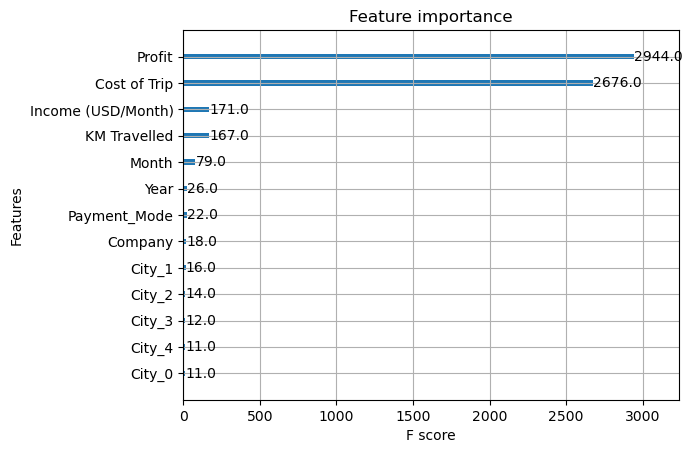

In [421]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [426]:
X=df_encoded[selected_features]
y=df_encoded['Price Charged']

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [438]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
predect=linear_reg.predict(X_test)
score=linear_reg.score(X_test,y_test)
print(f"score of the random forest:{score}")
mse = mean_squared_error(y_test, predect)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

score of the random forest:1.0
Root Mean Squared Error (RMSE): 0.0000


In [439]:
decision_tree = DecisionTreeRegressor(max_depth=None, random_state=42)
decision_tree.fit(X_train,y_train)
decision_tree_prediction=decision_tree.predict(X_test)
score=decision_tree.score(X_test,y_test)
print(f"score of the random forest:{score}")
mse = mean_squared_error(y_test, predect)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

score of the random forest:0.9999586879203661
Root Mean Squared Error (RMSE): 0.0000


In [437]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train,y_train)
random_forest_prediction=random_forest.predict(X_test)
score=random_forest.score(X_test,y_test)
print(f"score of the random forest:{score}")
mse = mean_squared_error(y_test, predect)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

score of the random forest:0.9999928592648589
Root Mean Squared Error (RMSE): 0.0000


In [442]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [443]:
with open('model.pkl','wb') as f:
    pickle.dump(random_forest,f)

In [444]:
with open('df.pkl','wb') as f:
    pickle.dump(df_encoded,f)

## Feature selection

### Filter Methods:

- **Correlation-based Feature Selection (CFS):** Evaluates the correlation between each feature and the target variable.
- **Chi-square Test:** Measures the dependency between the feature and the target using the chi-square statistic.
- **Information Gain:** Measures the reduction in entropy or uncertainty in the target variable given a feature.

### Wrapper Methods:

- **Recursive Feature Elimination (RFE):** Iteratively removes features and evaluates model performance until the optimal subset is found.
- **Forward Selection:** Starts with an empty set of features and adds features one by one based on their contribution to model performance.
- **Backward Elimination:** Starts with all features and removes them one by one based on their contribution to model performance.

### Embedded Methods:

- **Lasso (L1 regularization):** Penalizes the absolute size of coefficients, effectively driving some coefficients to zero, thus performing feature selection.
- **Ridge (L2 regularization):** Penalizes the squared size of coefficients, which tends to shrink coefficients towards zero, but rarely leads to actual feature selection.
- **Elastic Net:** Combines L1 and L2 penalties, providing a balance between the sparsity of Lasso and the stability of Ridge.

### Dimensionality Reduction:

- **Principal Component Analysis (PCA):** Reduces dimensionality by projecting data onto a lower-dimensional subspace while preserving most of the variance.
- **Linear Discriminant Analysis (LDA):** A dimensionality reduction technique that finds the linear combinations of features that best separate different classes.
- **t-distributed Stochastic Neighbor Embedding (t-SNE):** Reduces dimensionality while preserving the local structure of the data, often used for visualization.

### Feature Importance Methods:

- **Random Forest Feature Importance:** Measures the importance of each feature by the decrease in impurity (e.g., Gini impurity) when the feature is used for splitting.
- **Gradient Boosting Feature Importance:** Measures the contribution of each feature to the model's predictive performance during the boosting process.

### Hybrid Methods:

- **Genetic Algorithms:** Utilize evolutionary algorithms to search for an optimal subset of features based on a predefined fitness function.
- **Boruta Algorithm:** Utilizes a wrapper method with random forest to iteratively evaluate the importance of features and determine their significance.
